In [ ]:
## Data from https://www.knowi.com/coronavirus-dashboards/covid-19-api/
# or just use downloaded data


In [1]:
#import moduels what we need

import requests
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("covid19_data.csv")

In [3]:
df.shape
## 행은 적고 열이 많은 데이터


(30, 853)

In [4]:
df

,Report_Date,Afghanistan_cases,Afghanistan_deaths,Afghanistan_recovered,Albania_cases,Albania_deaths,Albania_recovered,Algeria_cases,Algeria_deaths,Algeria_recovered,...,Winter Olympics 2022_recovered,Yemen_cases,Yemen_deaths,Yemen_recovered,Zambia_cases,Zambia_deaths,Zambia_recovered,Zimbabwe_cases,Zimbabwe_deaths,Zimbabwe_recovered
0,2022-04-06,177974,7671,0,274055,3492,0,265705,6874,0,...,0,11812,2144,0,317358,3967,0,246803,5453,0
1,2022-04-07,177974,7671,0,274108,3492,0,265707,6874,0,...,0,11812,2145,0,317483,3967,0,246870,5455,0
2,2022-04-08,177974,7671,0,274136,3492,0,265714,6874,0,...,0,11812,2146,0,317483,3967,0,246925,5457,0
3,2022-04-09,177974,7671,0,274191,3492,0,265720,6874,0,...,0,11813,2147,0,317483,3967,0,246925,5457,0
4,2022-04-10,177974,7671,0,274219,3493,0,265724,6874,0,...,0,11813,2147,0,317483,3967,0,246958,5457,0
5,2022-04-11,178141,7675,0,274219,3493,0,265727,6874,0,...,0,11814,2147,0,317804,3967,0,247010,5460,0
6,2022-04-12,178257,7676,0,274272,3494,0,265730,6874,0,...,0,11814,2147,0,317804,3968,0,247094,5460,0
7,2022-04-13,178295,7676,0,274320,3494,0,265731,6874,0,...,0,11815,2147,0,318113,3969,0,247160,5460,0
8,2022-04-14,178352,7676,0,274376,3495,0,265733,6874,0,...,0,11815,2147,0,318229,3969,0,247208,5462,0
9,2022-04-15,178373,7676,0,274429,3495,0,265738,6874,0,...,0,11817,2148,0,318404,3970,0,247237,5462,0


In [5]:
df.describe()

,Afghanistan_cases,Afghanistan_deaths,Afghanistan_recovered,Albania_cases,Albania_deaths,Albania_recovered,Algeria_cases,Algeria_deaths,Algeria_recovered,Andorra_cases,...,Winter Olympics 2022_recovered,Yemen_cases,Yemen_deaths,Yemen_recovered,Zambia_cases,Zambia_deaths,Zambia_recovered,Zimbabwe_cases,Zimbabwe_deaths,Zimbabwe_recovered
count,30.000000,30.000000,30.0,30.000000,30.000000,30.0,30.000000,30.000000,30.0,30.000000,...,30.0,30.000000,30.000000,30.0,30.000000,30.000000,30.0,30.000000,30.000000,30.0
mean,178521.833333,7678.800000,0.0,274656.966667,3495.066667,0.0,265751.600000,6874.400000,0.0,40886.233333,...,0.0,11816.633333,2147.900000,0.0,318735.666667,3972.500000,0.0,247432.833333,5464.566667,0.0
std,331.756567,4.482918,0.0,380.623217,1.507071,0.0,25.296313,0.498273,0.0,440.489437,...,0.0,2.341284,1.268994,0.0,825.550029,3.607941,0.0,382.889566,5.243606,0.0
min,177974.000000,7671.000000,0.0,274055.000000,3492.000000,0.0,265705.000000,6874.000000,0.0,40024.000000,...,0.0,11812.000000,2144.000000,0.0,317358.000000,3967.000000,0.0,246803.000000,5453.000000,0.0
25%,178309.250000,7676.000000,0.0,274334.000000,3494.250000,0.0,265731.500000,6874.000000,0.0,40709.000000,...,0.0,11815.000000,2147.000000,0.0,318142.000000,3969.000000,0.0,247172.000000,5460.500000,0.0
50%,178592.500000,7680.000000,0.0,274606.000000,3496.000000,0.0,265750.000000,6874.000000,0.0,41013.000000,...,0.0,11818.000000,2148.000000,0.0,318812.000000,3973.500000,0.0,247359.500000,5466.500000,0.0
75%,178839.750000,7683.000000,0.0,274983.750000,3496.000000,0.0,265775.250000,6875.000000,0.0,41265.000000,...,0.0,11818.000000,2149.000000,0.0,319553.250000,3976.000000,0.0,247770.250000,5469.000000,0.0
max,178905.000000,7684.000000,0.0,275266.000000,3496.000000,0.0,265786.000000,6875.000000,0.0,41717.000000,...,0.0,11819.000000,2149.000000,0.0,319755.000000,3976.000000,0.0,248050.000000,5471.000000,0.0


In [6]:
## USA 만 보면
usa_cols = [col for col in df.columns if 'US' in col]
## 열 이름중에 us 가 들어간 열의 이름을 리스트로 저장 

In [7]:
df_us = df[['Report_Date'] + usa_cols] 
# 리스트 에 하나 추가하기 

In [8]:
df_us.head()

,Report_Date,USA_cases,USA_deaths,USA_recovered
0,2022-04-06,80255129,984260,0
1,2022-04-07,80302516,984953,0
2,2022-04-08,80390106,985593,0
3,2022-04-09,80402760,985732,0
4,2022-04-10,80412219,985757,0


In [12]:
df2 = df_us[["Report_Date", "USA_cases"]]
df2.columns = ["ds", "y"]

In [14]:
train = df2.copy()

In [15]:
prophet = Prophet( growth= 'linear',
                  daily_seasonality='auto',
                  weekly_seasonality='auto',
                  yearly_seasonality='auto',
                  changepoint_prior_scale='0.01')

In [16]:
prophet.fit(train)

15:09:34 - cmdstanpy - INFO - Chain [1] start processing
15:09:36 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future = prophet.make_future_dataframe(periods=30)
forecast = prophet.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-04-06,8.023511e+07,8.025511e+07,8.025511e+07,8.023511e+07,8.023511e+07,19999.943588,19999.943588,19999.943588,19999.943588,19999.943588,19999.943588,0.0,0.0,0.0,8.025511e+07
1,2022-04-07,8.027293e+07,8.030249e+07,8.030249e+07,8.027293e+07,8.027293e+07,29561.028553,29561.028553,29561.028553,29561.028553,29561.028553,29561.028553,0.0,0.0,0.0,8.030249e+07
2,2022-04-08,8.034410e+07,8.039008e+07,8.039008e+07,8.034410e+07,8.034410e+07,45982.391398,45982.391398,45982.391398,45982.391398,45982.391398,45982.391398,0.0,0.0,0.0,8.039008e+07
3,2022-04-09,8.039804e+07,8.040274e+07,8.040274e+07,8.039804e+07,8.039804e+07,4695.510263,4695.510263,4695.510263,4695.510263,4695.510263,4695.510263,0.0,0.0,0.0,8.040274e+07
4,2022-04-10,8.045598e+07,8.041220e+07,8.041220e+07,8.045598e+07,8.045598e+07,-43787.430169,-43787.430169,-43787.430169,-43787.430169,-43787.430169,-43787.430169,0.0,0.0,0.0,8.041220e+07
5,2022-04-11,8.048076e+07,8.045398e+07,8.045398e+07,8.048076e+07,8.048076e+07,-26779.269699,-26779.269699,-26779.269699,-26779.269699,-26779.269699,-26779.269699,0.0,0.0,0.0,8.045398e+07
6,2022-04-12,8.051934e+07,8.048967e+07,8.048967e+07,8.051934e+07,8.051934e+07,-29672.173934,-29672.173934,-29672.173934,-29672.173934,-29672.173934,-29672.173934,0.0,0.0,0.0,8.048967e+07
7,2022-04-13,8.051124e+07,8.053124e+07,8.053124e+07,8.051124e+07,8.051124e+07,19999.943588,19999.943588,19999.943588,19999.943588,19999.943588,19999.943588,0.0,0.0,0.0,8.053124e+07
8,2022-04-14,8.055064e+07,8.058020e+07,8.058020e+07,8.055064e+07,8.055064e+07,29561.028553,29561.028553,29561.028553,29561.028553,29561.028553,29561.028553,0.0,0.0,0.0,8.058020e+07
9,2022-04-15,8.056966e+07,8.061564e+07,8.061564e+07,8.056966e+07,8.056966e+07,45982.391398,45982.391398,45982.391398,45982.391398,45982.391398,45982.391398,0.0,0.0,0.0,8.061564e+07


C:\Users\msong\anaconda3\envs\py3_11_8\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\msong\anaconda3\envs\py3_11_8\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


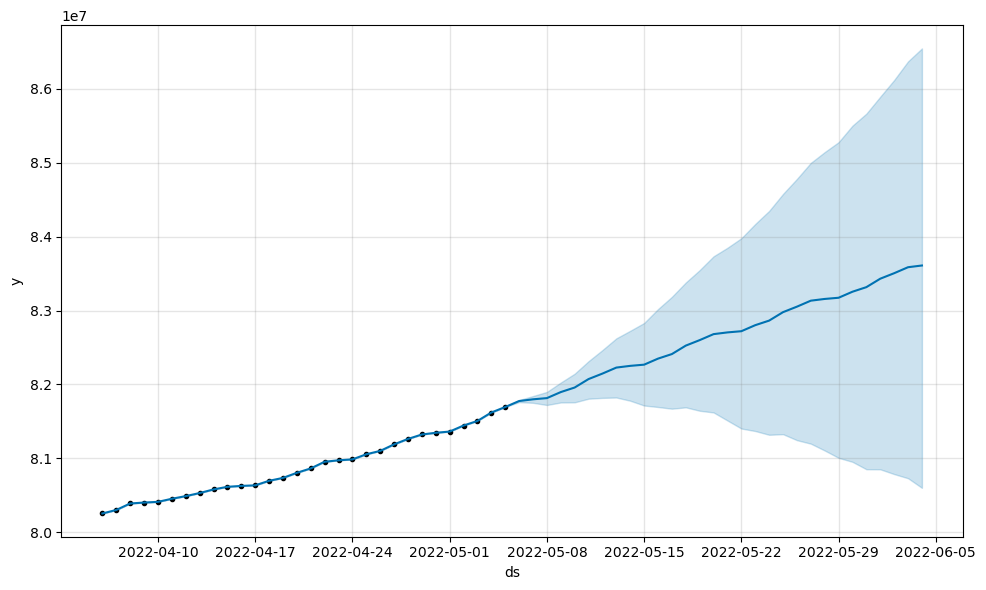

In [22]:
prophet.plot(forecast)
plt.show()

C:\Users\msong\anaconda3\envs\py3_11_8\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


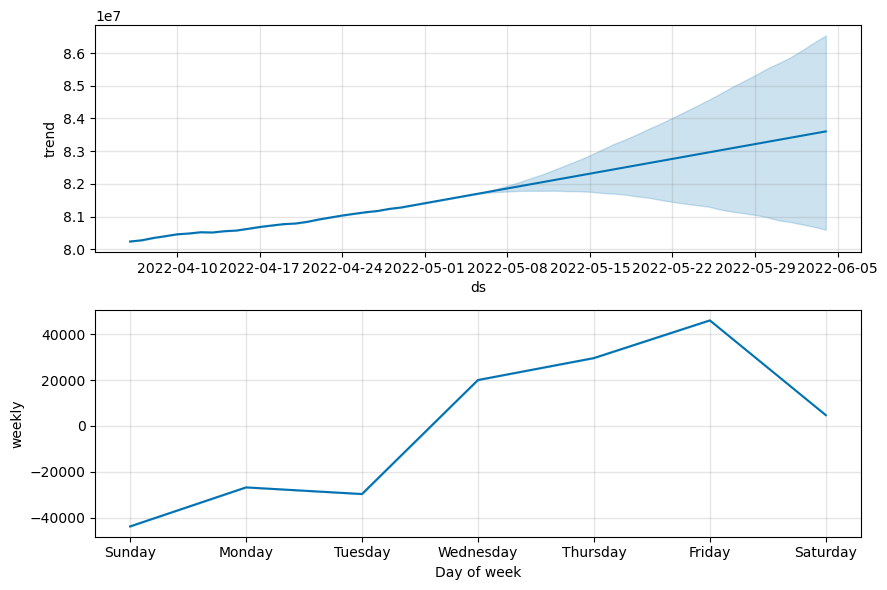

In [21]:
prophet.plot_components(forecast)
plt.show()